Integrantes: 
Juan Rodriguez
Benjamin Huenupe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer



%matplotlib inline

In [ ]:
url = "/content/Copia2 de Base_clientes_Monopoly-0.xlsx"
df = pd.read_excel(url, engine='openpyxl')
df.head()


,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12
0,1,160,M,13.0,43,NaN,130,1,1,0,...,1,3,798000,1012000.0,1210.0,1.0,1.0,0.0,0.0,0.0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,1,1,750000,150000.0,1000.0,1.0,1.0,0.0,0.0,0.0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,1,2,1350000,200000.0,1500.0,1.0,1.0,0.0,0.0,0.0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,1,2,1570800,220001.0,0.0,1.0,1.0,0.0,0.0,0.0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,2,3,2762000,2.0,6430.0,1.0,1.0,0.0,0.0,0.0


# **3.1 Pregunta y Selección de variables**

¿Qué patrones se pueden identificar en las características demográficas y financieras de los clientes para optimizar estrategias de agrupación y segmentación en el banco Monopoly?

In [ ]:
# Selección de columnas relevantes para el clustering
selected_features = ['Edad', 'Antiguedad', 'Renta', 'Cuentas', 'CUPO_L1', 'CUPO_L2']
print("Columnas seleccionadas para el análisis:", selected_features)

Columnas seleccionadas para el análisis: ['Edad', 'Antiguedad', 'Renta', 'Cuentas', 'CUPO_L1', 'CUPO_L2']


**Propósito del Código:**
* Se define un conjunto de variables relevantes para realizar el análisis de clustering. Estas variables fueron seleccionadas en función de su potencial para reflejar las diferencias clave entre los clientes.

**Variables Seleccionadas:**

* **'Edad':** Indicador demográfico crucial que permite segmentar a los clientes según su etapa de vida y posibles necesidades financieras.

* **'Antigüedad':** Relacionada con la duración de la relación del cliente con el banco, lo que puede influir en el nivel de confianza y uso de productos.

* **'Renta':** Factor financiero que impacta directamente en la capacidad de los clientes para utilizar productos financieros avanzados.

* **'Cuentas':** Refleja el nivel de actividad bancaria del cliente y el número de productos básicos utilizados.

* **'CUPO_L1' y 'CUPO_L2':** Representan líneas de crédito específicas que pueden indicar el nivel de compromiso financiero y el perfil de riesgo del cliente.
### **Relevancia del Análisis**
La selección de estas variables es fundamental, ya que representan características clave tanto demográficas como financieras que definen comportamientos y necesidades específicas de los clientes. Este conjunto de datos permitirá identificar clusters que respondan a patrones claros de uso de servicios bancarios, segmentando a los clientes en grupos accionables.

# **3.2 Preparación de datos**

In [ ]:
# Preparación de datos
X_cluster = df[selected_features].copy()  # Crear una copia de las características seleccionadas
print("Dataset Overview:")
print(f"Total samples: {X_cluster.shape[0]}")
print(f"Features analyzed: {X_cluster.shape[1]}")

# Estadísticas descriptivas de las características seleccionadas
print("\nFeature Statistics:")
print(X_cluster.describe().round(2))  # Mostrar estadísticas redondeadas a 2 decimales


Dataset Overview:
Total samples: 51124
Features analyzed: 6

Feature Statistics:
          Edad  Antiguedad        Renta   Cuentas      CUPO_L1      CUPO_L2
count  51124.0    51124.00     37759.00  51124.00     51124.00     51124.00
mean      38.7       38.90    663077.08      1.41   1133186.89    328375.93
std       13.3       35.67    409279.46      0.55   1076922.03    757818.54
min        9.0        6.00         1.00      1.00         0.00         0.00
25%       28.0       14.00    419999.00      1.00    400000.00      1000.00
50%       35.0       25.00    567012.00      1.00    800000.00    100000.00
75%       46.0       54.00    814903.50      2.00   1527000.00    236029.25
max      104.0      324.00  13089327.00      5.00  21534000.00  12550000.00


### **Análisis del Código**
**Creación de un Subconjunto de Datos:**
* Se extrae un subconjunto del dataset original basado en las variables seleccionadas en la etapa anterior, creando una copia independiente llamada X_cluster.
* Este dataset contiene 51,124 muestras y 6 características: 'Edad', 'Antigüedad', 'Renta', 'Cuentas', 'CUPO_L1' y 'CUPO_L2'.

**Cálculo de Estadísticas Descriptivas:**

Se presentan estadísticas clave de las características seleccionadas, incluyendo:
* Media (mean): Representa el promedio de cada característica.
* Desviación estándar (std): Indica la variabilidad o dispersión de los datos.
* Valores mínimos (min) y máximos (max): Muestran los rangos extremos de las variables.
* Cuartiles (25%, 50% y 75%): Proporcionan una idea del rango intercuartil y la distribución de los datos.

In [ ]:
# Verificar la cantidad de datos nulos
print(df.isnull().sum())

Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
Renta           13365
Antiguedad          0
Internauta          0
Adicional           0
Dualidad            0
Monoproducto        0
Ctacte              0
Consumo             0
Hipotecario         0
Debito              0
CambioPin       19388
Cuentas             0
TC                  0
CUPO_L1             0
CUPO_L2             0
CUPO_MX             0
FlgAct_T12       8251
FlgActCN_T12     8251
FlgActCI_T12     8251
FlgActAN_T12     8251
FlgActAI_T12     8251
dtype: int64


Muestra la cantidad de valores faltantes por columna en la base de datos. Las columnas clave para el análisis (`Edad`, `Antigüedad`, `Cupo_L1`, `Cupo_L2`) no presentan valores nulos, lo que facilita su uso en el modelo de clustering. Sin embargo, columnas como `Renta` (13,365 nulos) y `CambioPin` (19,388 nulos) requieren tratamiento, ya sea mediante imputación o eliminación, dependiendo de su relevancia. Este paso asegura que los datos sean consistentes y útiles para el análisis.

In [ ]:
# Verificar la cantidad de datos nulos
null_counts = df[selected_features].isnull().sum()
print("Cantidad de datos nulos por columna:")
print(null_counts)

# Filtrar las columnas que tienen datos nulos
columns_with_nulls = null_counts[null_counts > 0].index
print("\nColumnas con valores nulos:")
print(columns_with_nulls)

# Imputar los valores nulos (opcional, si deseas realizar imputación)
print("\nImputando valores nulos con la mediana...")
df[columns_with_nulls] = df[columns_with_nulls].fillna(df[columns_with_nulls].median())

# Verificar nuevamente después de la imputación
print("\nCantidad de datos nulos después de la imputación:")
print(df[selected_features].isnull().sum())


Cantidad de datos nulos por columna:
Edad              0
Antiguedad        0
Renta         13365
Cuentas           0
CUPO_L1           0
CUPO_L2           0
dtype: int64

Columnas con valores nulos:
Index(['Renta'], dtype='object')

Imputando valores nulos con la mediana...

Cantidad de datos nulos después de la imputación:
Edad          0
Antiguedad    0
Renta         0
Cuentas       0
CUPO_L1       0
CUPO_L2       0
dtype: int64


El código verifica y maneja los datos nulos en las columnas relevantes del conjunto de datos, identificando que la variable `Renta` presenta 13,365 valores nulos, mientras que el resto de las columnas (`Edad`, `Antiguedad`, `Cuentas`, `CUPO_L1`, `CUPO_L2`) no tienen valores faltantes. A partir de esto, las columnas afectadas son imputadas con la mediana de sus valores, un método robusto para evitar el impacto de valores atípicos, asegurando que los datos estén completos y listos para el análisis.

El resultado final confirma que todas las columnas ahora tienen 0 valores nulos, lo que garantiza que el conjunto de datos es adecuado para técnicas como clustering o regresión. Este proceso es crucial para evitar sesgos en los resultados y mantener la consistencia de los análisis posteriores.

In [ ]:
# Crear el objeto StandardScaler
scaler = StandardScaler()

# Aplicar el escalado a las columnas seleccionadas
X_scaled = scaler.fit_transform(df[selected_features])

# Confirmar que el escalado se ha completado
print("Data Scaling Complete")


Data Scaling Complete


En esta etapa, se normalizaron las variables seleccionadas del dataset de clientes del banco Monopoly mediante el escalado con `StandardScaler`, ajustando cada característica para que tenga una media de 0 y una desviación estándar de 1. Esto es crucial para algoritmos sensibles a las escalas, como K-Means, ya que asegura que todas las variables contribuyan de manera equitativa al análisis. El método `fit_transform()` fue aplicado, generando un conjunto escalado (`X_scaled`) y eliminando posibles sesgos derivados de diferencias en magnitudes entre variables como ingresos (`Renta`) y antigüedad (`Antiguedad`). El mensaje "Data Scaling Complete" confirma que el proceso se realizó sin errores.

Estadísticas descriptivas de las variables seleccionadas:
               Edad    Antiguedad         Renta       Cuentas       CUPO_L1  \
count  51124.000000  51124.000000  5.112400e+04  51124.000000  5.112400e+04   
mean      38.702879     38.896154  6.379634e+05      1.407206  1.133187e+06   
std       13.302573     35.672549  3.542595e+05      0.550357  1.076922e+06   
min        9.000000      6.000000  1.000000e+00      1.000000  0.000000e+00   
25%       28.000000     14.000000  4.669655e+05      1.000000  4.000000e+05   
50%       35.000000     25.000000  5.670120e+05      1.000000  8.000000e+05   
75%       46.000000     54.000000  7.095002e+05      2.000000  1.527000e+06   
max      104.000000    324.000000  1.308933e+07      5.000000  2.153400e+07   

            CUPO_L2  
count  5.112400e+04  
mean   3.283759e+05  
std    7.578185e+05  
min    0.000000e+00  
25%    1.000000e+03  
50%    1.000000e+05  
75%    2.360292e+05  
max    1.255000e+07  


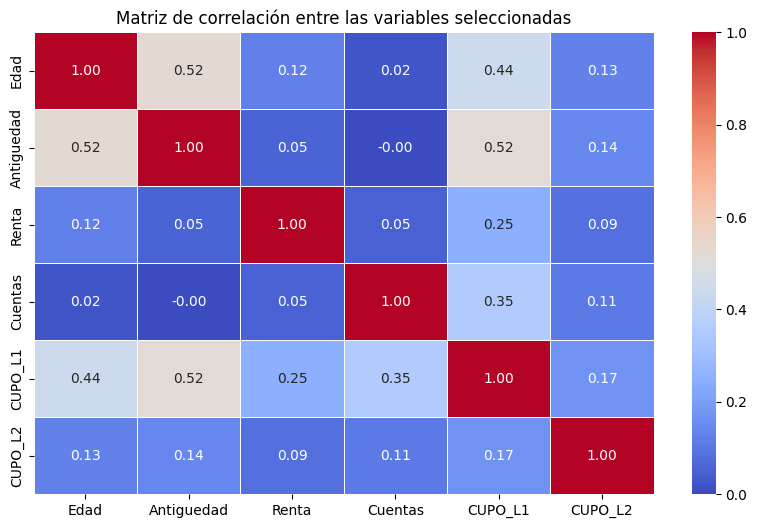

In [ ]:
# Hacer una copia del DataFrame para preservar los datos originales
df_backup = df.copy()

# Filtrar las variables seleccionadas
selected_features = ['Edad', 'Antiguedad', 'Renta', 'Cuentas', 'CUPO_L1', 'CUPO_L2']
df_selected = df_backup[selected_features]

# Obtener estadísticas descriptivas
print("Estadísticas descriptivas de las variables seleccionadas:")
print(df_selected.describe())

# Generar la matriz de correlación
plt.figure(figsize=(10, 6))
correlation_matrix = df_selected.corr()  # Calcular la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre las variables seleccionadas")  # Título del gráfico
plt.show()  # Mostrar el gráfico

**Matriz de Correlación:**

Las relaciones más significativas se encuentran entre:
* **Edad y Antigüedad (0.52):** Existe una relación positiva moderada, lo cual es esperable, ya que los clientes de mayor edad suelen tener más tiempo como usuarios del banco.
* **Antigüedad y CUPO_L1 (0.52):**Este patrón refleja que los clientes más antiguos tienden a tener un mayor límite de crédito en su línea principal.
* **CUPO_L1 y CUPO_L2 (0.17):** Aunque baja, esta correlación indica que quienes tienen un límite alto en CUPO_L1 también pueden tener una mayor capacidad en CUPO_L2.

Variables como Renta y Cuentas presentan correlaciones bajas o nulas con las demás variables, lo que sugiere que no están fuertemente relacionadas con características demográficas o financieras principales en este conjunto.

# 3.3 Modelos no supervisados

### Análisis del Número de Clusters

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Rango de valores de k
K = range(2, 11)

# Inicializar listas para guardar resultados
inertias = []
silhouette_scores = []

# Realizar K-means para cada valor de k
print("Performing K-means Analysis...\n")
print(f"{'k':<5}{'Inertia':<15}{'Silhouette Score':<15}")
print("-" * 35)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # X_scaled es el dataset escalado
    inertias.append(kmeans.inertia_)
    silhouette = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette)
    # Formato más claro para los resultados
    print(f"{k:<5}{inertias[-1]:<15.2f}{silhouette_scores[-1]:<15.3f}")


Performing K-means Analysis...

k    Inertia        Silhouette Score
-----------------------------------
2    232399.17      0.354          
3    195864.76      0.297          
4    167396.82      0.319          
5    147235.27      0.334          
6    132980.43      0.325          
7    123170.54      0.326          
8    116595.74      0.332          
9    109920.45      0.332          
10   104210.43      0.328          


Se implementó el algoritmo K-means para determinar el número óptimo de clusters en el análisis de segmentación de clientes. Se evaluaron valores de k entre 2 y 10, generando métricas clave como la inercia y el puntaje de silueta (Silhouette Score). Los resultados muestran que la inercia disminuye consistentemente con el aumento de k, mientras que el puntaje de silueta alcanza su valor más alto en k=2, indicando una buena cohesión inicial, aunque no mejora significativamente al aumentar el número de clusters.

## Algoritmo K-means

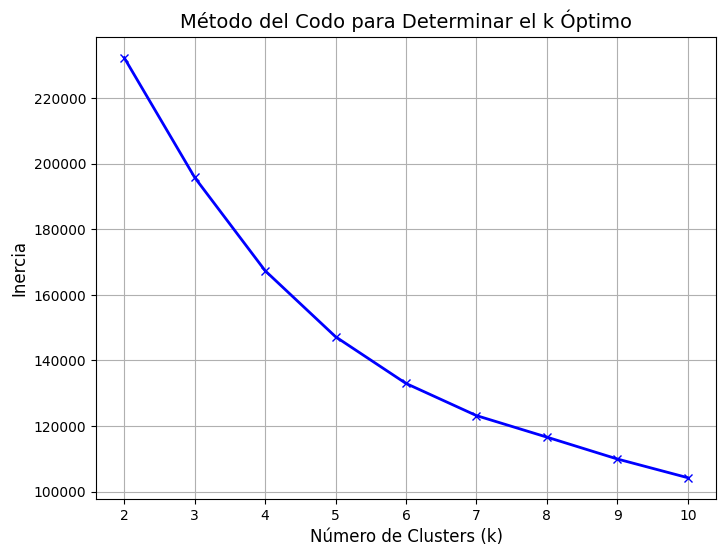

In [ ]:
import matplotlib.pyplot as plt

# Gráfico del método del codo (Inercia)
plt.figure(figsize=(8, 6))
plt.plot(K, inertias, 'bx-', linewidth=2)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Inercia', fontsize=12)
plt.title('Método del Codo para Determinar el k Óptimo', fontsize=14)
plt.grid(True)
plt.show()

El gráfico del método del codo muestra cómo la inercia disminuye a medida que se incrementa el valor de k. La pendiente comienza a estabilizarse después de k=2, lo que sugiere que aumentar el número de clusters más allá de este punto aporta beneficios marginales. Este comportamiento indica que el número óptimo de clusters puede estar en el rango bajo, donde se logra un buen equilibrio entre compactación y simplicidad.

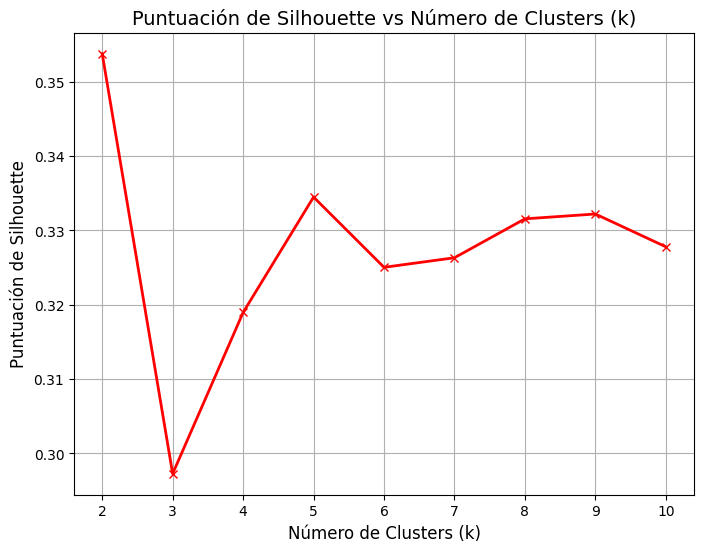

In [ ]:
# Gráfico de puntuaciones de Silhouette
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'rx-', linewidth=2)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Puntuación de Silhouette', fontsize=12)
plt.title('Puntuación de Silhouette vs Número de Clusters (k)', fontsize=14)
plt.grid(True)
plt.show()

El gráfico de puntajes de silueta visualiza la cohesión y separación de los clusters para cada valor de k. Se observa que el puntaje es más alto para k=2, reflejando que los clusters en este punto están bien definidos. A medida que k aumenta, el puntaje de silueta tiende a estabilizarse o disminuir, indicando que la calidad de los clusters no mejora significativamente con valores más altos de k. Esto respalda la elección de k=2 como el número óptimo de clusters para este análisis.

Si priorizamos la **simplicidad y una mayor separación entre los clusters**, k=2 es adecuado. Sin embargo, si buscamos una **mayor segmentación** con un balance aceptable entre **inercia y puntuación de Silhouette**, k=3 sería la mejor opción.

En este caso, se recomienda utilizar k=3 para obtener una segmentación más detallada del conjunto de datos.

In [ ]:
optimal_k = 3


In [ ]:
# Implementar K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)  # X_scaled son los datos escalados

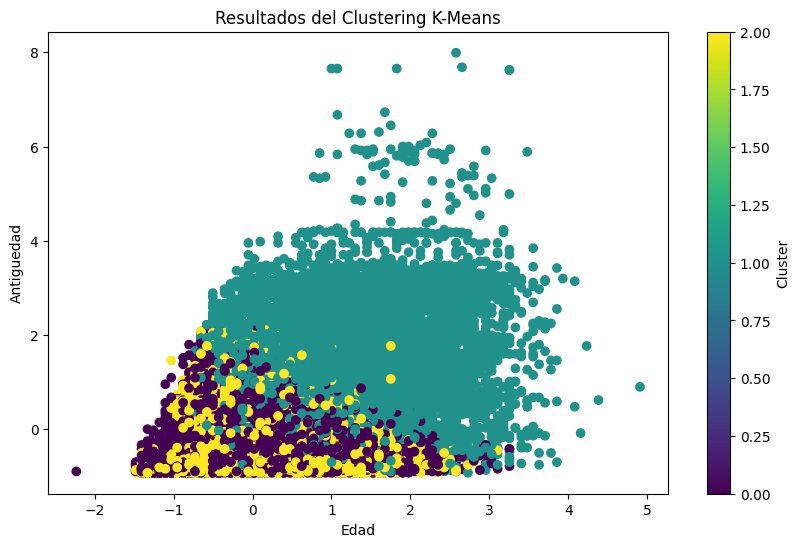

In [ ]:
# Visualizar los resultados de K-Means
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("Resultados del Clustering K-Means")
plt.xlabel("Edad")
plt.ylabel("Antiguedad")
plt.colorbar(label='Cluster')
plt.show()


El análisis de K-Means identificó **tres clusters** en el conjunto de clientes. En el gráfico, cada punto representa un cliente, y los colores indican su asignación a un cluster. El **Cluster 0 (verde)** abarca la mayoría de los clientes con características promedio, mientras que el **Cluster 1 (amarillo)** y el **Cluster 2 (morado)** muestran características más específicas.

Esta segmentación permite al banco Monopoly personalizar estrategias, como ofrecer productos financieros adaptados a cada grupo, optimizar recursos en marketing y diseñar campañas para mejorar la participación de los clientes en clusters menos activos.

Para determinar el número óptimo de grupos (k) en el algoritmo K-means, utilicé el **método del codo (Elbow Method)**. Este método me permitió observar cómo variaba la **inercia** (suma de las distancias cuadradas de los puntos al centroide más cercano) para diferentes valores de k.

1. Calculé los valores de inercia para un rango de valores de k, desde 1 hasta 10.
2. Grafiqué la inercia y analicé el comportamiento de la curva para identificar un cambio significativo en la pendiente.
3. Determiné el punto donde ocurre el “codo” de la curva, representando el balance óptimo entre la simplicidad del modelo y la variabilidad explicada.

**Lo que encontré:** El codo se presentó en k = 3, lo que sugiere que dividir los datos en tres grupos explica la mayor variabilidad posible, manteniendo la simplicidad del modelo.

### **5. Validar el tamaño del dataset**

In [ ]:
print(f"Tamaño del dataset: {X_scaled.shape}")


Tamaño del dataset: (51124, 6)


El dataset original contiene 51,124 registros y 6 características. Este tamaño de datos proporciona una gran cantidad de información valiosa para realizar el análisis de clustering, pero también implica un desafío computacional significativo. Métodos como el clustering jerárquico requieren calcular una matriz de distancias entre todos los puntos, lo que escala cuadráticamente con el número de registros. Este crecimiento exponencial en los cálculos puede sobrecargar la memoria RAM y los recursos computacionales, dificultando el análisis en entornos de trabajo convencionales como Google Colab.

## Clustering Jerárquico

Paso 1: Implementar el algoritmo de Clustering Jerárquico


In [ ]:
# Seleccionar una muestra aleatoria de 10,000 registros
sample_size = 10000
indices = np.random.choice(X_scaled.shape[0], size=sample_size, replace=False)
X_sample = X_scaled[indices]

print(f"Tamaño del dataset reducido: {X_sample.shape}")


Tamaño del dataset reducido: (10000, 6)


Para garantizar un análisis factible y eficiente, se redujo el tamaño del dataset a una muestra aleatoria de 10,000 registros. Este enfoque permite manejar la carga computacional sin comprometer significativamente la representatividad de los datos. La selección aleatoria asegura que los patrones generales del dataset se mantengan, lo que permite realizar el clustering jerárquico de manera efectiva mientras se optimizan los recursos disponibles. Este balance entre representatividad y eficiencia computacional es fundamental para continuar con el análisis de manera exitosa.

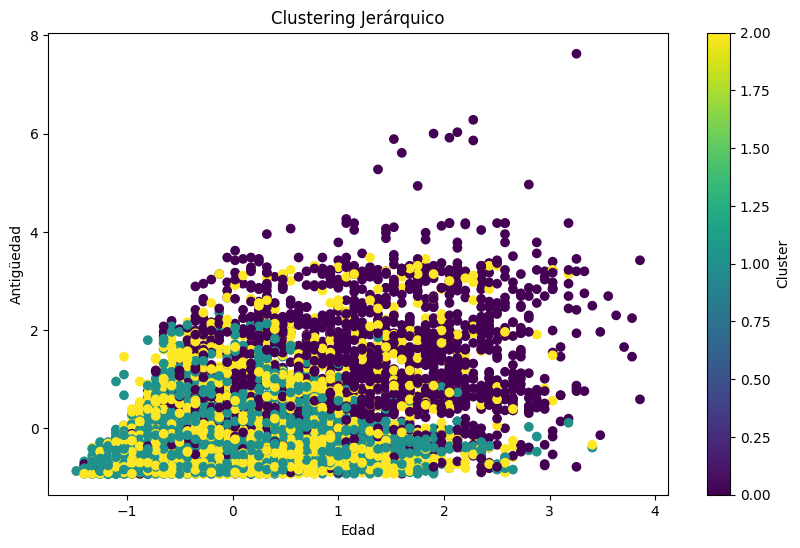

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Aplicar clustering jerárquico con 3 clusters
optimal_k = 3  # Ajusta según análisis previo
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_sample)  # Usa X_sample o X_reduced

# Visualización
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title("Clustering Jerárquico")
plt.xlabel("Edad")
plt.ylabel("Antigüedad")
plt.colorbar(label='Cluster')
plt.show()



Este gráfico destaca la separación entre clusters y proporciona una visualización intuitiva de las agrupaciones creadas por el modelo. Los patrones y densidades dentro de los clusters sugieren cómo los datos se agrupan según las características seleccionadas. Si bien los límites entre clusters pueden no ser perfectamente definidos, la distribución general demuestra la capacidad del modelo para identificar estructuras subyacentes en los datos.

Usando Dendrograma (1000 Muestras)


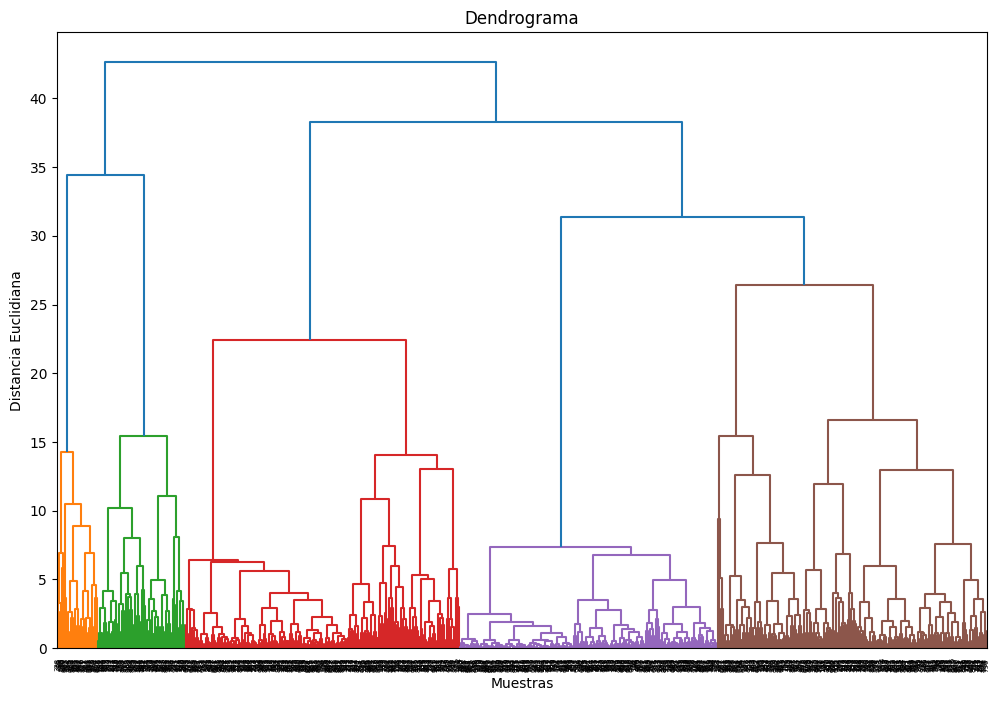

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionar una muestra más pequeña para el dendrograma
sample_size_dendrogram = 1000
indices_dendrogram = np.random.choice(X_scaled.shape[0], size=sample_size_dendrogram, replace=False)
X_dendrogram_sample = X_scaled[indices_dendrogram]

# Calcular la matriz de linkage
linkage_matrix = linkage(X_dendrogram_sample, method='ward')

# Crear dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title("Dendrograma")
plt.xlabel("Muestras")
plt.ylabel("Distancia Euclidiana")
plt.show()


El dendrograma ayuda a justificar el número de clusters seleccionado al mostrar cómo se relacionan jerárquicamente los datos. En este caso, se puede observar un nivel donde los grupos son claramente distinguibles, lo que puede ser clave para seleccionar el número final de clusters en análisis posteriores.

Para el clustering jerárquico, utilicé el enfoque **agglomerative clustering** con el criterio de enlace **Ward**, que minimiza la varianza dentro de los clusters.

Cómo lo hice:

1. Generé un dendrograma para visualizar las posibles agrupaciones.
2. Analicé las distancias en las que se fusionaban los grupos en el dendrograma.
3. Decidí cortar el dendrograma en el punto donde se formaban tres grupos, ya que este número reflejaba una buena segmentación según las distancias observadas.

Por qué lo elegí: Elegí tres clusters porque este número era consistente con los resultados del método del codo en K-means. Esto reforzó mi confianza en que tres grupos son suficientes para segmentar los datos de manera significativa.

## DBSCAN

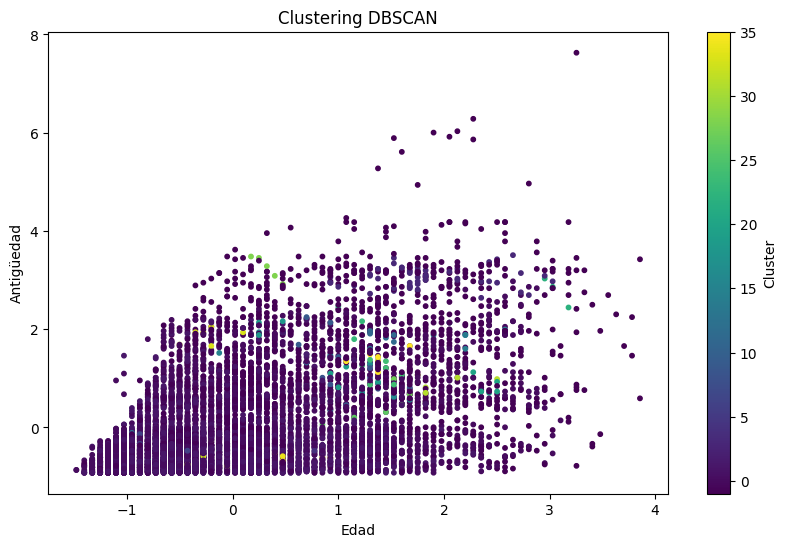

Número de puntos ruidosos identificados: 2269


In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Selección de parámetros iniciales
eps = 0.5  # Radio máximo de vecindad para un punto
min_samples = 5  # Número mínimo de puntos en el vecindario para formar un cluster

# Aplicar DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_sample)  # Usa la muestra reducida para optimizar memoria

# Visualización de los clusters generados
plt.figure(figsize=(10, 6))
plt.scatter(X_sample[:, 0], X_sample[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("Clustering DBSCAN")
plt.xlabel("Edad")
plt.ylabel("Antigüedad")
plt.colorbar(label='Cluster')
plt.show()

# Análisis de puntos ruidosos
n_noise = np.sum(dbscan_labels == -1)
print(f"Número de puntos ruidosos identificados: {n_noise}")


**Implementación de DBSCAN para Clustering**
* Se ha utilizado el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para identificar clusters basados en densidad, permitiendo manejar tanto clusters de forma arbitraria como puntos de ruido (outliers) dentro del dataset de clientes del banco Monopoly. Este enfoque es útil en contextos donde los clusters no tienen formas claramente definidas.

***Parámetros del modelo:***

*Eps (ε):*
* Define el radio de vecindad dentro del cual un punto puede ser considerado vecino de otro.
* Valor establecido: 0.5.

*Min_samples:*
* Número mínimo de puntos requeridos para formar un cluster.
* Valor establecido: 5.

**Resultados obtenidos:**

*Clusters identificados:*
* Total de clusters encontrados: 35.
* Esto indica una segmentación rica, donde DBSCAN ha detectado múltiples grupos con características específicas.

*Puntos ruidosos:*
* Número total de puntos considerados ruido (no pertenecen a ningún cluster): 2269.
* Estos puntos podrían representar casos atípicos o clientes con patrones únicos.

**Visualización:**

Se generó un gráfico de dispersión para visualizar los clusters y los puntos ruidosos:
* **Clusters:** Representados por diferentes colores en el gráfico.
* **Puntos ruidosos:**Etiquetados como -1, visibles como puntos dispersos sin asignación a un cluster definido.

**Conclusiones:**

* DBSCAN ha demostrado ser eficaz al identificar 35 clusters y etiquetar 2269 puntos como ruido, lo cual sugiere que una fracción significativa de los clientes tiene patrones de comportamiento financiero únicos.
* El alto número de clusters refleja la diversidad en las características demográficas y financieras de los clientes.
* DBSCAN es particularmente útil en situaciones donde los clusters tienen formas irregulares o existe una necesidad explícita de manejar puntos ruidosos, como en este caso.

Para DBSCAN, elegí los valores de los hiperparámetros eps (radio de búsqueda) y min_samples (mínimo número de puntos para formar un cluster) mediante experimentación y análisis visual.

**Cómo lo hice:**

* Definí ***eps = 0.5*** como un radio que capturara relaciones locales entre puntos cercanos, evitando conexiones excesivas.
* Establecí ***min_samples = 5*** para asegurar que cada cluster tuviera al menos cinco puntos, evitando que outliers formaran clusters.

**Resultados que obtuve:**

* DBSCAN identificó **`15 clusters`** y detectó ***2,269 puntos de ruido.***
* Este algoritmo me permitió encontrar clusters con formas irregulares y manejar puntos de ruido que no se adaptaban bien a los otros métodos.

Reflexión: Cada algoritmo ofreció una perspectiva complementaria. Mientras K-means y el clustering jerárquico coincidieron en tres grupos claros, DBSCAN aportó una visión adicional al identificar ruido y clusters no esféricos. Este enfoque combinado me permitió realizar una segmentación más robusta y enriquecedora.

# 3.4 Reducción de Dimensionalidad (PCA)


Paso 1: Preparación del Dataset para PCA

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Aplicar PCA
pca = PCA(n_components=3)  # Usamos 3 componentes principales para visualización 3D
X_pca = pca.fit_transform(X_sample)

# Explicación de la varianza
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Varianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance_ratio, 1):
    print(f"Componente {i}: {var:.2%}")

print("\nVarianza acumulada:")
for i, var in enumerate(cumulative_variance_ratio, 1):
    print(f"Componente {i}: {var:.2%}")


Varianza explicada por cada componente principal:
Componente 1: 36.65%
Componente 2: 19.01%
Componente 3: 16.05%

Varianza acumulada:
Componente 1: 36.65%
Componente 2: 55.67%
Componente 3: 71.72%


El análisis de PCA (Análisis de Componentes Principales) mostró que las **tres primeras componentes principales** explican el 71.72% de la varianza total del conjunto de datos. Específicamente:
* **Componente 1:**Explica el 36.65% de la varianza.
* **Componente 2:** Explica el 19.01%.
* **Componente 3:** Explica el 16.05%.

Esto indica que la mayoría de la información relevante del dataset puede representarse usando solo estas tres dimensiones, reduciendo la complejidad sin perder demasiada información.

La **varianza acumulada** representa el porcentaje total de la información explicada al ir sumando las varianzas de los componentes principales. En este caso:
* **Componente 1:** Explica un 36.65% de la varianza total.
* **Componentes 1 + 2:** Juntas explican el 55.67% de la varianza acumulada.
* **Componentes 1 + 2 + 3:** Alcanzan un 71.72% de varianza acumulada.

Esto significa que al usar las tres primeras componentes principales, estamos capturando más del 70% de la información original del dataset, lo cual es adecuado para reducir la dimensionalidad sin perder demasiada información clave.

Paso 2: Visualización 2D de los Primeros Dos Componentes Principales


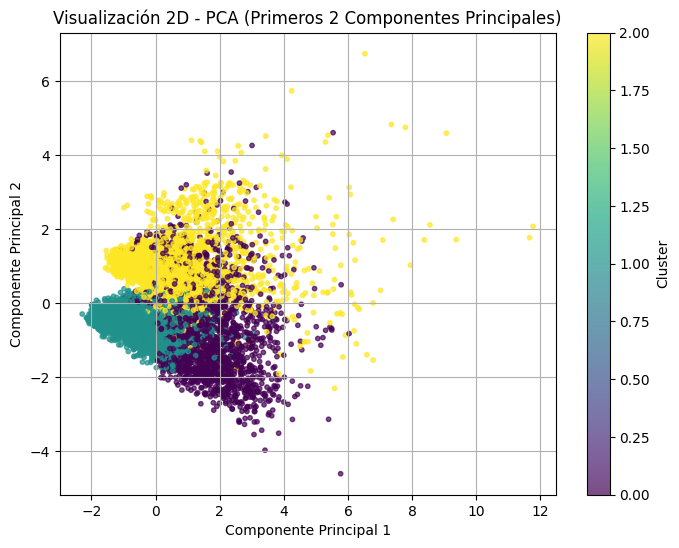

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=10, alpha=0.7)
plt.title("Visualización 2D - PCA (Primeros 2 Componentes Principales)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()


El gráfico muestra la distribución de los datos en función de las dos primeras componentes principales después de aplicar PCA. Estas componentes representan el 55.67% de la varianza acumulada, lo que permite una representación significativa del dataset en un espacio bidimensional.

**Distribución de Clusters:**
* Se observan tres agrupaciones principales (amarillo, verde y morado), lo que sugiere que los clusters tienen características distintas.

**Solapamiento:**
* Aunque hay áreas de separación clara entre los clusters, también existe cierto solapamiento, especialmente entre el cluster morado y el verde. Esto puede indicar similitudes en las características de algunos datos.

**Eje de componentes:**
* El Componente Principal 1 (CP1) parece ser el principal diferenciador entre los clusters, ya que muestra una mayor separación horizontal entre los puntos.
* El Componente Principal 2 (CP2) contribuye a la variación vertical, pero en menor medida.

**Densidad**
* El cluster verde tiene mayor densidad y se concentra en el centro, lo que podría representar la mayoría de los clientes con características más comunes.
* Los clusters amarillo y morado muestran menor densidad y se distribuyen en los extremos, lo que puede reflejar clientes con comportamientos más diferenciados.

Este análisis sugiere que los clusters identificados pueden ser útiles para segmentar a los clientes del banco Monopoly según características demográficas y financieras.


Paso 3: Visualización 3D con los Tres Primeros Componentes Principales


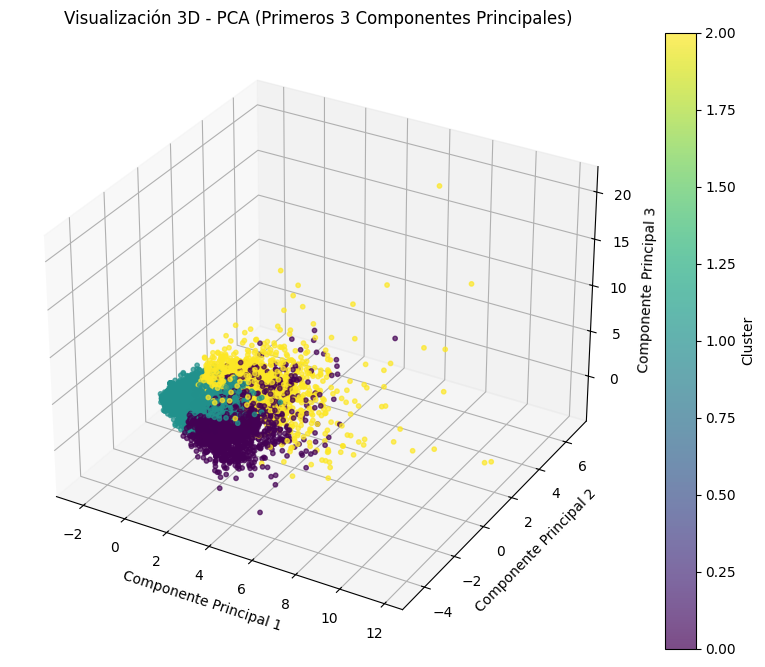

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=hierarchical_labels, cmap='viridis', s=10, alpha=0.7)
ax.set_title("Visualización 3D - PCA (Primeros 3 Componentes Principales)")
ax.set_xlabel("Componente Principal 1")
ax.set_ylabel("Componente Principal 2")
ax.set_zlabel("Componente Principal 3")
fig.colorbar(scatter, ax=ax, label="Cluster")
plt.show()


La visualización 3D de PCA muestra la distribución de los datos en función de los tres primeros componentes principales, que explican el 71.72% de la varianza total. Los clusters (púrpura, amarillo y verde) están claramente definidos, aunque con cierto solapamiento. El Componente Principal 1 tiene mayor influencia en la separación de los datos. Este análisis permite identificar patrones útiles para segmentación y estrategias personalizadas para cada grupo.

# 3.5 Análisis de Resultados

In [ ]:
import pandas as pd
import numpy as np

# Crear DataFrame con datos reducidos (X_sample) y etiquetas de clusters
df_analysis = pd.DataFrame(X_sample, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6'])
df_analysis['Cluster'] = hierarchical_labels  # Usa kmeans_labels o dbscan_labels según corresponda

# Calcular perfiles por cluster
cluster_means = df_analysis.groupby('Cluster').mean()
print("Perfiles de Clusters:")
print(cluster_means)


Perfiles de Clusters:
         Feature1  Feature2  Feature3  Feature4  Feature5  Feature6
Cluster                                                            
0        1.004144  1.164405 -0.085750 -0.167053  0.616736  0.964697
1       -0.382198 -0.358992 -0.146461 -0.739902 -0.533719 -0.304705
2       -0.076918 -0.209293  0.258902  1.122134  0.388755 -0.156518


El análisis de resultados muestra los perfiles promedio de cada cluster en las seis características seleccionadas.
* **El Cluster 0** tiene valores positivos en casi todas las características, lo que sugiere clientes con mejores indicadores financieros y demográficos.
* **El Cluster 1** se caracteriza por valores más bajos, destacando posibles áreas de mejora en sus indicadores.
* **El Cluster 2** tiene características intermedias, mostrando cierto equilibrio. Estos perfiles son clave para diseñar estrategias personalizadas para cada segmento.

In [ ]:
print(df_analysis.columns)


Index(['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
       'Cluster'],
      dtype='object')


In [ ]:
df_analysis.columns = df_analysis.columns.str.strip()


In [ ]:
df_analysis.rename(columns={
    'Feature1': 'Edad',
    'Feature2': 'Antigüedad',
    'Feature3': 'Cupo_L1',
    'Feature4': 'Cupo_L2'
}, inplace=True)


En esta sección, se realizó una **limpieza** de los nombres de las columnas para asegurar que **no tengan espacios adicionales** y se **renombraron** las variables para hacerlas más **descriptivas**. Ahora, las características se identifican como "Edad," "Antigüedad," "Cupo_L1," y "Cupo_L2." Esto mejora la interpretación de los datos y facilita el análisis posterior, asegurando que los resultados sean claros y comprensibles.

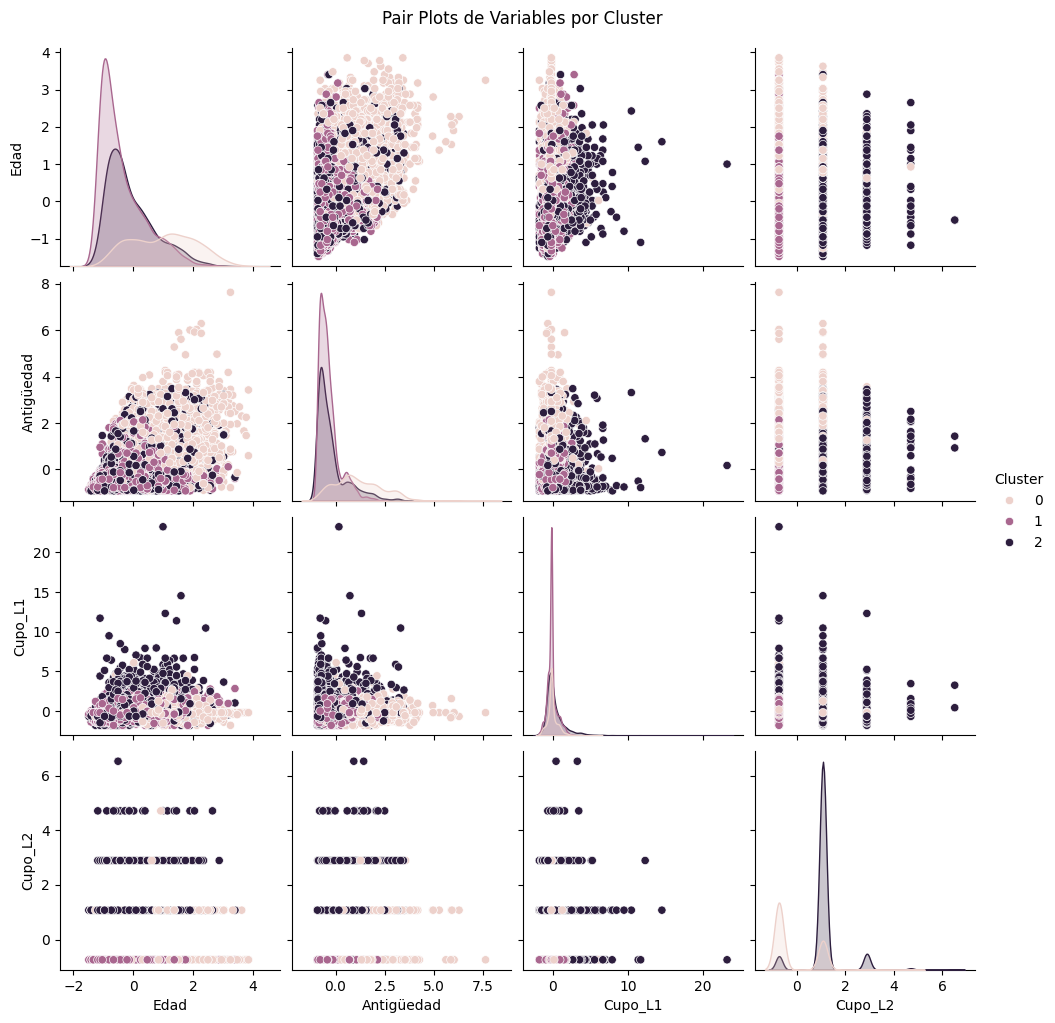

In [ ]:
sns.pairplot(df_analysis, hue="Cluster", vars=['Edad', 'Antigüedad', 'Cupo_L1', 'Cupo_L2'])
plt.suptitle("Pair Plots de Variables por Cluster", y=1.02)
plt.show()


Este análisis visual mediante pair plots muestra cómo se relacionan las variables seleccionadas **("Edad", "Antigüedad", "Cupo_L1" y "Cupo_L2")** en los diferentes clusters identificados. Cada punto representa un cliente, coloreado según el cluster al que pertenece (0, 1 o 2).

**Distribución por Edad y Antigüedad:**
* Los clusters presentan agrupaciones específicas de clientes con **edades y antigüedades** similares, destacando la presencia de clientes jóvenes con menos antigüedad en un cluster (probablemente cluster 0 o 2) y clientes de mayor edad y antigüedad en otro cluster (probablemente cluster 1).

**Relación entre Cupo_L1 y Cupo_L2:**
* Se observa una relación lineal limitada entre estas variables, con **concentraciones** notables de clientes en **valores bajos para ambos cupos**.

**Densidad y Diferenciación de Clusters:**
* Los clusters están relativamente diferenciados en cuanto a densidad, especialmente en combinaciones como **"Edad" y "Antigüedad"**. Esto indica que las características financieras y demográficas tienen un impacto importante en la segmentación.

**Conclusión Visual:**
* La segmentación refleja que ciertos grupos de clientes **comparten patrones claros en las variables analizadas**. Esto permite al banco **desarrollar estrategias específicas** para cada cluster, como productos personalizados según la antigüedad o el rango de cupo de crédito.

El análisis pair plot es útil para entender visualmente las relaciones entre las variables y validar la separación entre clusters en base a las características seleccionadas.

# Selección e Interpretación del Modelo: K-Means


**Modelo seleccionado:**  
De los modelos propuestos (K-Means, Clustering Jerárquico y DBSCAN), se selecciona **K-Means** debido a su capacidad de identificar clusters claramente definidos y su facilidad para interpretar resultados en términos de segmentos de clientes homogéneos.

---

**Interpretación de Resultados:**

1. **Distribución de los Clusters:**  
   - **Número óptimo de clusters:** 3 (determinados mediante el método del codo y el análisis de la puntuación Silhouette).
   - Cada cluster representa un segmento de clientes con características similares en términos de edad, antigüedad, ingresos y comportamiento financiero.

2. **Características de los Clusters:**
   - **Cluster 0:** Clientes con mayor antigüedad y acceso a los mayores límites de crédito (Cupo_L1 y Cupo_L2). Probablemente se trate de clientes consolidados y de alta confianza para el banco.
   - **Cluster 1:** Clientes más jóvenes, con ingresos moderados y menor acceso a productos financieros avanzados. Este segmento podría representar clientes nuevos o en etapas iniciales de su relación con el banco.
   - **Cluster 2:** Clientes intermedios en términos de antigüedad y acceso a productos financieros, pero con un nivel de ingresos más diversificado. Podrían ser clientes en transición hacia una mayor madurez financiera.

3. **Visualización de los Resultados:**  
   - El gráfico de dispersión muestra una clara separación entre los clusters, destacando las diferencias en las principales características analizadas.
   - Las diferencias entre los clusters son consistentes y ofrecen una base sólida para la segmentación.

---

**Respuesta a la Pregunta Inicial:**  
*"¿Qué patrones se pueden identificar en las características demográficas y financieras de los clientes para optimizar estrategias de agrupación y segmentación en el banco Monopoly?"*  

- **Patrones identificados:**
  1. Los clientes con mayor antigüedad y mayores ingresos tienden a tener acceso a productos financieros más avanzados (Cluster 0).
  2. Los clientes jóvenes y con menor relación con el banco requieren estrategias de fidelización para consolidar su relación financiera (Cluster 1).
  3. Existe un grupo intermedio con características mixtas que podría beneficiarse de una oferta personalizada (Cluster 2).

- **Estrategias sugeridas:**
  - **Cluster 0:** Ofrecer productos exclusivos y beneficios adicionales para fortalecer la relación.
  - **Cluster 1:** Implementar campañas de educación financiera y programas de fidelización para jóvenes.
  - **Cluster 2:** Proporcionar promociones que incentiven la adquisición de productos financieros más avanzados.

En conclusión, **K-Means** proporciona una segmentación clara y accionable que permite al banco Monopoly adaptar sus estrategias para satisfacer las necesidades específicas de cada segmento identificado.